[생활폐기물 반입 총량제현황](https://dream-ics.slc.or.kr/cp/st/st0006/cpst0006/viewList.do#;)

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# os에 따라 폰트 설정하기
import os

if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })

In [3]:
df = pd.read_csv("city_garbage_2004_2020.csv")
df.shape

(19095, 10)

## 컬럼명

In [4]:
col_name = {"ASGN_QY": "반입총량(톤)(쿼터량)", 
            "WT_1001":"반입량(톤)", 
            "WT_1002": "비고(연탄재 반입량 톤)",
            "RATE": "총량대비 반입비율(%)"}

In [5]:
df

,RATE,ORD,WT_1001,WT_1002,AR_GRP_CD,AR_NM,ASGN_QY,AR_CD,연,월
0,0.0,1,168519,244,NaN,NaN,0,totalsum,2004,1
1,0.0,2,125079,85,1.0,NaN,0,000,2004,1
2,0.0,2,6518,0,1.0,서울시종로구,0,100,2004,1
3,0.0,2,6658,0,1.0,서울시중구,0,102,2004,1
4,0.0,2,4868,0,1.0,서울시용산구,0,104,2004,1
...,...,...,...,...,...,...,...,...,...,...
19090,0.0,2,0,0,4.0,경기도안성시,1350,472,2020,12
19091,0.0,2,0,0,4.0,경기도가평군,2700,473,2020,12
19092,0.0,2,0,0,4.0,경기도용인시,648,474,2020,12
19093,0.0,2,0,0,4.0,경기도여주시,810,475,2020,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19095 entries, 0 to 19094
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RATE       19095 non-null  float64
 1   ORD        19095 non-null  int64  
 2   WT_1001    19095 non-null  int64  
 3   WT_1002    19095 non-null  int64  
 4   AR_GRP_CD  18891 non-null  float64
 5   AR_NM      18279 non-null  object 
 6   ASGN_QY    19095 non-null  int64  
 7   AR_CD      19095 non-null  object 
 8   연          19095 non-null  int64  
 9   월          19095 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.5+ MB


In [7]:
df = df[(df["AR_CD"] != "totalsum") & df["AR_NM"].notnull()].copy()

In [8]:
df.to_csv("city_garbage_2004_2020_remove_total.csv", index=False)

In [9]:
pd.read_csv("city_garbage_2004_2020_remove_total.csv")

,RATE,ORD,WT_1001,WT_1002,AR_GRP_CD,AR_NM,ASGN_QY,AR_CD,연,월
0,0.0,2,6518,0,1.0,서울시종로구,0,100,2004,1
1,0.0,2,6658,0,1.0,서울시중구,0,102,2004,1
2,0.0,2,4868,0,1.0,서울시용산구,0,104,2004,1
3,0.0,2,4514,0,1.0,서울시성동구,0,106,2004,1
4,0.0,2,7395,0,1.0,서울시동대문구,0,108,2004,1
...,...,...,...,...,...,...,...,...,...,...
18274,0.0,2,0,0,4.0,경기도안성시,1350,472,2020,12
18275,0.0,2,0,0,4.0,경기도가평군,2700,473,2020,12
18276,0.0,2,0,0,4.0,경기도용인시,648,474,2020,12
18277,0.0,2,0,0,4.0,경기도여주시,810,475,2020,12


## 전처리

In [10]:
# 시도명 추출
df.loc[df["AR_NM"].str.contains("서울") & df["AR_NM"].notnull(), "시도"] = "서울"
df.loc[df["AR_NM"].str.contains("경기") & df["AR_NM"].notnull(), "시도"] = "경기"
df.loc[df["AR_NM"].str.contains("인천") & df["AR_NM"].notnull(), "시도"] = "인천"
df.loc[df["AR_NM"].str.contains("수원") & df["AR_NM"].notnull(), "시도"] = "수원"

In [11]:
# 구군추출
df["구군"] = df["AR_NM"].str.replace("서울시", "")
df["구군"] = df["구군"].str.replace("인천시", "")
df["구군"] = df["구군"].str.replace("경기도", "")

In [12]:
# 중복 데이터 확인
print(df.shape)
df.drop_duplicates().shape

(18279, 12)


(18279, 12)

In [13]:
# 지역별 빈도수 확인
df["AR_NM"].value_counts()

서울시성동구         204
인천시서구          204
인천시남동구         204
경기도수원시         204
경기도의정부시        204
              ... 
서울시(환경행정담당)     10
경기도건설본부          2
파주시하수도과          2
인천시경제자유구역청       1
체육시설관리사업소        1
Name: AR_NM, Length: 133, dtype: int64

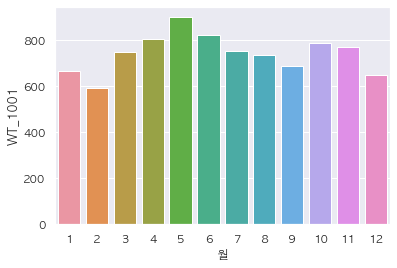

In [14]:
sns.barplot(data=df, x="월", y="WT_1001", ci=None)

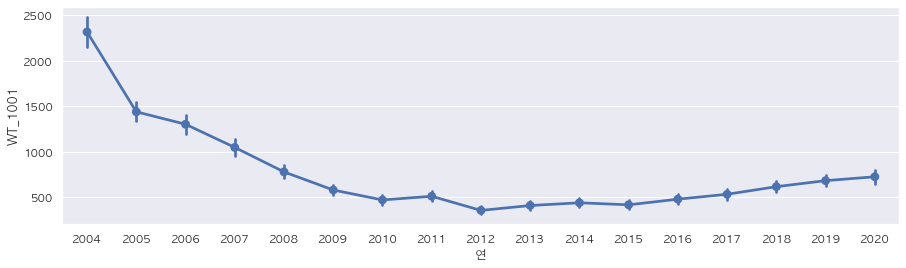

In [15]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df, x="연", y="WT_1001")

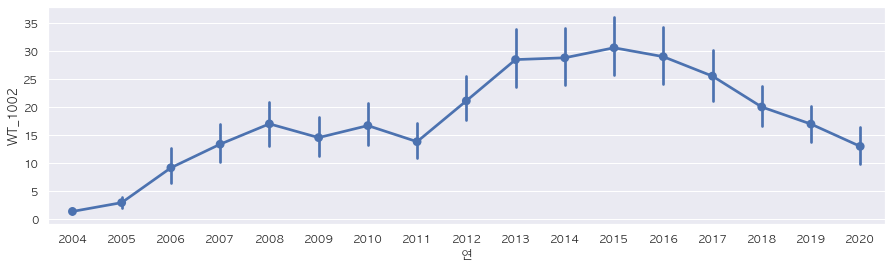

In [16]:
plt.figure(figsize=(15, 4))
plt.title("")
sns.pointplot(data=df, x="연", y="WT_1002")

In [17]:
df["AR_NM"].notnull()

2        True
3        True
4        True
5        True
6        True
         ... 
19090    True
19091    True
19092    True
19093    True
19094    True
Name: AR_NM, Length: 18279, dtype: bool

## 서울 서브셋

In [18]:
df_seoul = df[df["시도"] == "서울"]

## 서울 반입량 시각화

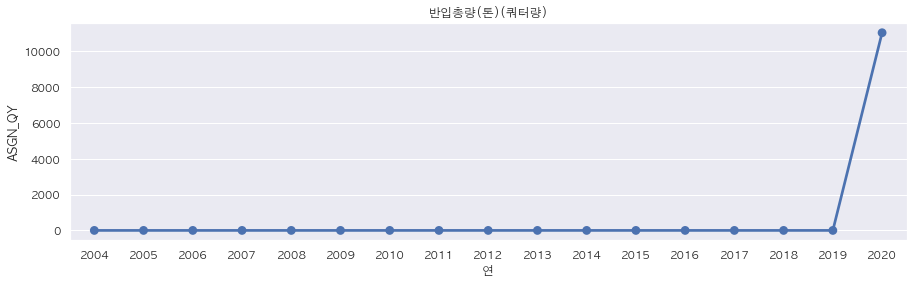

In [19]:
# 2020년부터 쿼터량이 추가된 것으로 추정됨 
plt.figure(figsize=(15, 4))
plt.title("반입총량(톤)(쿼터량)")
sns.pointplot(data=df_seoul, x="연", y="ASGN_QY", ci=None)

In [20]:
df_seoul_2020 = df_seoul[df_seoul["연"] == 2020]
df_seoul_2020.head()

,RATE,ORD,WT_1001,WT_1002,AR_GRP_CD,AR_NM,ASGN_QY,AR_CD,연,월,시도,구군
18281,6.3,2,816,0,1.0,서울시종로구,13047,100,2020,1,서울,종로구
18282,10.0,2,1355,0,1.0,서울시중구,13540,102,2020,1,서울,중구
18283,12.0,2,796,0,1.0,서울시용산구,6609,104,2020,1,서울,용산구
18284,4.4,2,405,12,1.0,서울시성동구,9148,106,2020,1,서울,성동구
18285,7.2,2,503,35,1.0,서울시동대문구,6994,108,2020,1,서울,동대문구


In [21]:
# 값이 구별로 같은 것으로 ASGN_QY 는 지역별 할당량인것으로 추정됨
df_seoul_2020.set_index("구군").loc[["강남구", "서초구", "종로구"]]

,RATE,ORD,WT_1001,WT_1002,AR_GRP_CD,AR_NM,ASGN_QY,AR_CD,연,월,시도
구군,,,,,,,,,,,
강남구,7.0,2,582,36,1.0,서울시강남구,8323,138,2020,1,서울
강남구,3.7,2,312,27,1.0,서울시강남구,8323,138,2020,2,서울
강남구,13.2,2,1099,15,1.0,서울시강남구,8323,138,2020,3,서울
강남구,20.9,2,1736,27,1.0,서울시강남구,8323,138,2020,4,서울
강남구,73.0,2,6072,0,1.0,서울시강남구,8323,138,2020,5,서울
강남구,31.9,2,2651,14,1.0,서울시강남구,8323,138,2020,6,서울
강남구,0.5,2,42,0,1.0,서울시강남구,8323,138,2020,7,서울
강남구,0.7,2,60,0,1.0,서울시강남구,8323,138,2020,8,서울
강남구,0.7,2,59,0,1.0,서울시강남구,8323,138,2020,9,서울


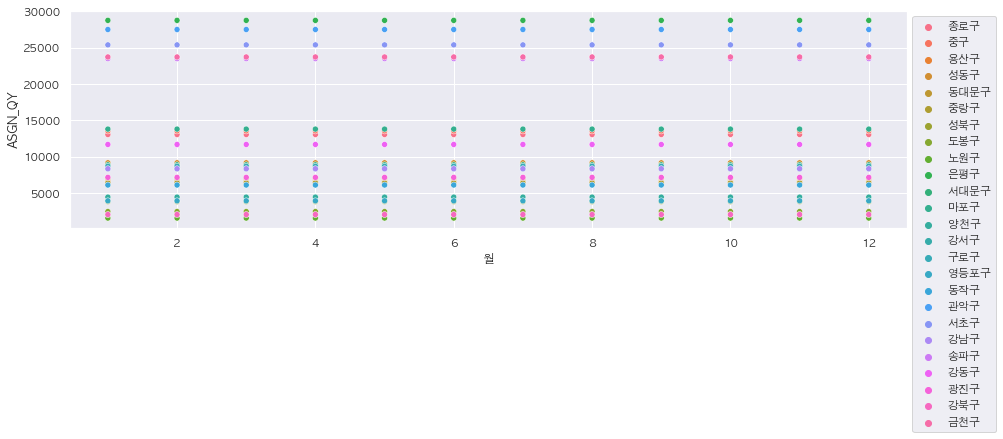

In [22]:
# 매월 같은 값으로 지역별 할당량으로 추정됨
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df_seoul_2020, x="월", y="ASGN_QY", hue="구군")
plt.legend(bbox_to_anchor=(1, 1))

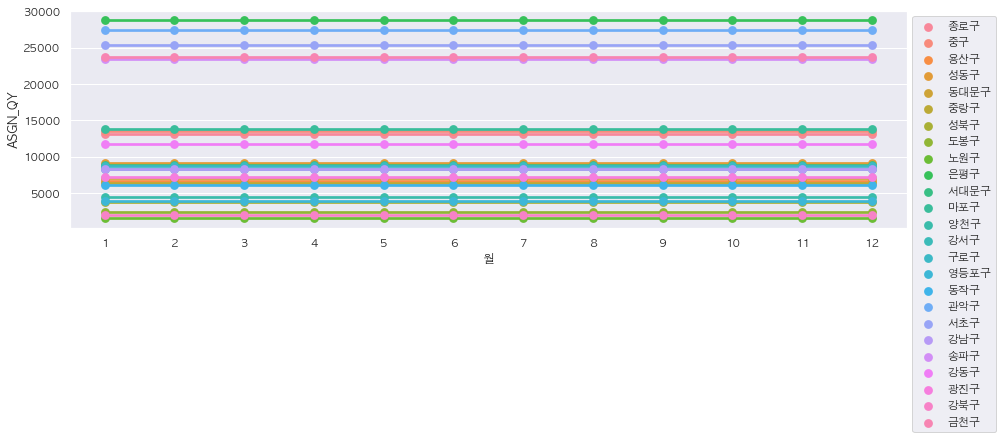

In [23]:
# 매월 같은 값으로 지역별 할당량으로 추정됨
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_seoul_2020, x="월", y="ASGN_QY", hue="구군")
plt.legend(bbox_to_anchor=(1, 1))

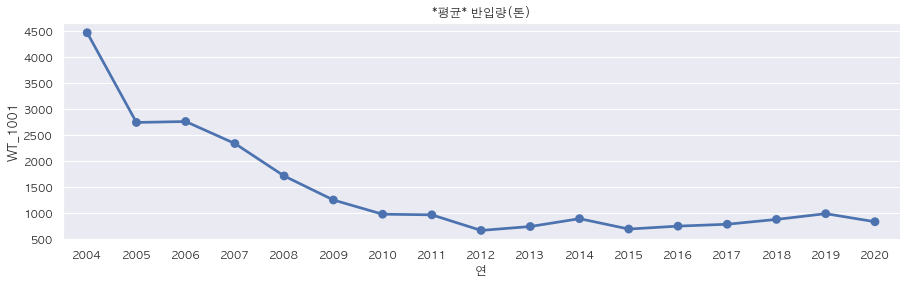

In [24]:
plt.figure(figsize=(15, 4))
plt.title("*평균* 반입량(톤)")
sns.pointplot(data=df_seoul, x="연", y="WT_1001", ci=None)

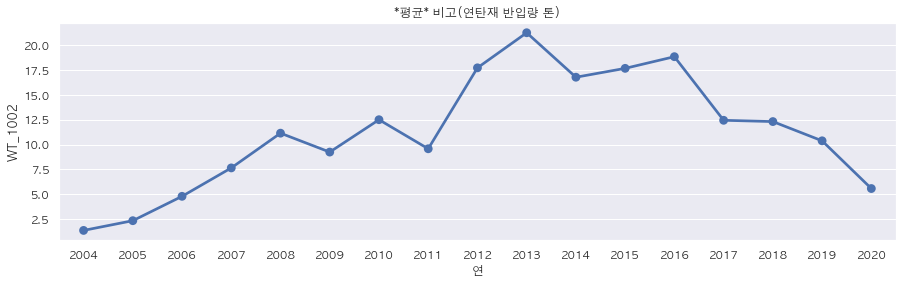

In [25]:
plt.figure(figsize=(15, 4))
plt.title("*평균* 비고(연탄재 반입량 톤)")
sns.pointplot(data=df_seoul, x="연", y="WT_1002", ci=None)

In [26]:
df.query("연 == 2020 & 월 == 10").head(30)

,RATE,ORD,WT_1001,WT_1002,AR_GRP_CD,AR_NM,ASGN_QY,AR_CD,연,월,시도,구군
18893,0.8,2,108,0,1.0,서울시종로구,13047,100,2020,10,서울,종로구
18894,1.2,2,165,0,1.0,서울시중구,13540,102,2020,10,서울,중구
18895,4.3,2,283,0,1.0,서울시용산구,6609,104,2020,10,서울,용산구
18896,2.5,2,232,0,1.0,서울시성동구,9148,106,2020,10,서울,성동구
18897,1.7,2,119,0,1.0,서울시동대문구,6994,108,2020,10,서울,동대문구
18898,2.8,2,181,0,1.0,서울시중랑구,6386,110,2020,10,서울,중랑구
18899,1.1,2,41,0,1.0,서울시성북구,3803,112,2020,10,서울,성북구
18900,0.0,2,0,0,1.0,서울시도봉구,2425,114,2020,10,서울,도봉구
18901,0.0,2,0,0,1.0,서울시노원구,1530,116,2020,10,서울,노원구
18902,2.7,2,791,0,1.0,서울시은평구,28774,118,2020,10,서울,은평구


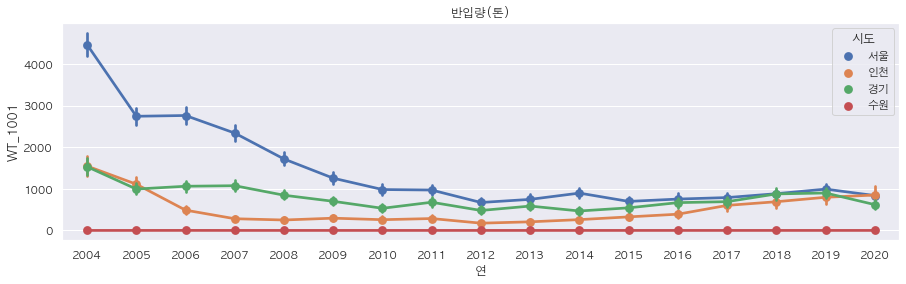

In [27]:
plt.figure(figsize=(15, 4))
plt.title("반입량(톤)")
sns.pointplot(data=df, x="연", y="WT_1001", hue="시도")